<a href="https://colab.research.google.com/github/IdaSharonJ/Python-exercises/blob/main/14_SEP_Logistic_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LOGISTIC REGRESSION**

**STEP 1: IMPORT NECESSARY LIBRARIES**

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

**STEP 2: READ THE DATASET**

In [23]:
data = pd.read_csv('Employee Travel.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4410 non-null   int64 
 1   Attrition         4410 non-null   object
 2   BusinessTravel    4410 non-null   object
 3   Department        4410 non-null   object
 4   DistanceFromHome  4410 non-null   int64 
 5   Education         4410 non-null   int64 
 6   Gender            4410 non-null   object
 7   MaritalStatus     4410 non-null   object
dtypes: int64(3), object(5)
memory usage: 275.8+ KB


In [24]:
data.count().sort_values()

Age                 4410
Attrition           4410
BusinessTravel      4410
Department          4410
DistanceFromHome    4410
Education           4410
Gender              4410
MaritalStatus       4410
dtype: int64

In [25]:
data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Gender,MaritalStatus
0,51,No,Travel_Rarely,Sales,6,2,Female,Married
1,31,Yes,Travel_Frequently,Research & Development,10,1,Female,Single
2,32,No,Travel_Frequently,Research & Development,17,4,Male,Married
3,38,No,Travel_Rarely,Research & Development,2,5,Male,Married
4,32,No,Travel_Rarely,Research & Development,10,1,Male,Single
5,46,No,Travel_Rarely,Research & Development,8,3,Female,Married
6,28,Yes,Travel_Rarely,Research & Development,11,2,Male,Single
7,29,No,Travel_Rarely,Research & Development,18,3,Male,Married
8,31,No,Travel_Rarely,Research & Development,1,3,Male,Married
9,25,No,Travel_Rarely,Research & Development,7,4,Female,Married


In [26]:
data.isna().sum()

Age                 0
Attrition           0
BusinessTravel      0
Department          0
DistanceFromHome    0
Education           0
Gender              0
MaritalStatus       0
dtype: int64

In [27]:
data = data.drop(columns = ['Age','DistanceFromHome'], axis = 1)
data = data.dropna(how='any')
print(data.shape)

(4410, 6)


**STEP 3: RECODE THE VALUES**

In [28]:
data['Attrition'].replace({'No': 0, 'Yes': 1},inplace = True)
data['BusinessTravel'].replace({'Travel_Rarely': 0, 'Travel_Frequently': 1},inplace = True)
data['Department'].replace({'Sales': 0, 'Research & Development': 1},inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)
data['MaritalStatus'].replace({'Single': 0, 'Married': 1},inplace = True)

In [29]:
data.head()

,Attrition,BusinessTravel,Department,Education,Gender,MaritalStatus
0,0,0,0,2,1,1
1,1,1,1,1,1,0
2,0,1,1,4,0,1
3,0,0,1,5,0,1
4,0,0,1,1,0,0


**STEP 4: NORMALIZE THE DATA**

In [30]:
standa = preprocessing.MinMaxScaler()
standa.fit(data)
data = pd.DataFrame(standa.transform(data), index = data.index, columns = data.columns)
data.head()

,Attrition,BusinessTravel,Department,Education,Gender,MaritalStatus
0,0.0,0.0,0.0,0.25,1.0,1.0
1,1.0,1.0,1.0,0.00,1.0,0.0
2,0.0,1.0,1.0,0.75,0.0,1.0
3,0.0,0.0,1.0,1.00,0.0,1.0
4,0.0,0.0,1.0,0.00,0.0,0.0


**STEP 4: CALCULATE CORRELATION MATRIX**

In [33]:
corr = data.corr()
corr1 = pd.DataFrame(abs(corr['BusinessTravel']),columns = ['Department'])
nonvals = corr1.loc[corr1['Department'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

#Extracting variables with correlation less than 0.5%
data = data.drop(columns=nonvals,axis=1)
print('CorrData',data.shape)

Var correlation < 0.5% Empty DataFrame
Columns: [Department]
Index: []
CorrData (4410, 6)


**STEP 5: SPLITTING DATASET INTO TEST AND TRAIN DATASET**

In [34]:
from sklearn.model_selection import train_test_split
Y = data['BusinessTravel']
X = data.drop(columns=['Department'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (3528, 5)
Y train shape:  (3528,)
X test shape:  (882, 5)
Y test shape:  (882,)


**STEP 6: USE LOGISTIC REGRESSION FOR PREDICTION**

In [36]:
from sklearn.linear_model import LogisticRegression
# defining the model
logreg = LogisticRegression()

# training the model
logreg.fit(X_train, Y_train)

# predicting the target values
Y_predict1 = logreg.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
classification_report(Y_test,Y_predict1)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       683\n         1.0       1.00      1.00      1.00       199\n\n    accuracy                           1.00       882\n   macro avg       1.00      1.00      1.00       882\nweighted avg       1.00      1.00      1.00       882\n'

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict1)

array([[683,   0],
       [  0, 199]])

In [39]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test,Y_predict1)
print("The accuracy of the logistic regression ML model is", acc_score*100)

The accuracy of the logistic regression ML model is 100.0


## **LINEAR REGRESION**

**STEP 1: IMPORT NECESSARY LIBRARIES**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**STEP 2: READ THE DATASET**

In [48]:
data = pd.read_csv('Sales.csv')
data.head()

,Tv,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tv      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [50]:
data.shape

(200, 2)

In [51]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

**STEP 3: SPLIT THE DATASET INTO TEST AND TRAIN DATASET**

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [54]:
y_pred = regressor.predict(X_test)
y_pred

array([10.93127621,  9.88042193, 12.09159447, 22.99968079, 16.45920756,
       10.21976029,  7.6199906 , 20.28497391,  8.4464437 , 17.95886418,
       21.44529217, 11.91645209, 15.71485245, 17.42249065, 11.32534656,
       13.72260788, 21.68063975,  7.18213465, 11.23230217, 18.82362968,
       22.88474361, 14.82272095, 16.72739433, 14.35202581, 10.07198391,
       13.88133066, 16.20744039, 18.36388094, 19.40378881,  8.51759529,
       10.85465142, 18.03001578, 22.50709285, 20.3725451 ,  7.86628457,
        8.16731053, 10.40584907, 17.03936669, 10.88749061,  8.51212209,
        9.16343282,  8.86788005, 14.96502414, 18.61564811, 18.93309367,
       12.76479799,  7.6145174 ,  8.06879294, 14.02363385, 12.86878878,
       13.15339515, 19.70481478, 21.03480222, 17.26376787,  9.59034237,
       10.55362545, 23.17482317, 16.58509115, 18.22705095,  7.54336581])

In [55]:
print(regressor.score(X_test, Y_test))

0.8150168765722069


**STEP 4: VISUALIZE THE TRAINING SET**

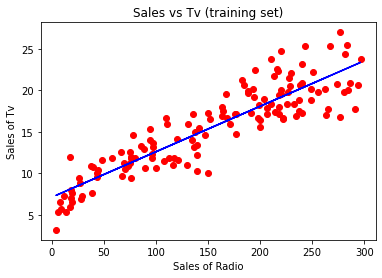

In [57]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs Tv (training set)')
plt.xlabel('Sales of Radio')
plt.ylabel('Sales of Tv')
plt.show()

**STEP 5: VISUALIZE THE TEST SET**

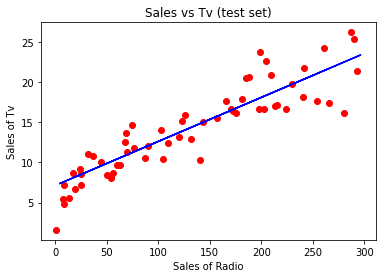

In [58]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs Tv (test set)')
plt.xlabel('Sales of Radio')
plt.ylabel('Sales of Tv')
plt.show()